In [1]:
using PyPlot;

# Aufgabe 2
### Teil a

In [2]:
function mocaint(func, limits, N, args=[])
    dim = size(limits)[1]
    V = 1
    random_numbers = rand(N, dim)
    for i in 1:dim
        V *= limits[i,2]-limits[i,1] # Volumen berechnen
        # die Zufallszahlen muessen an das Intervall angepasst werden
        random_numbers[:,i] = random_numbers[:,i]*(limits[i,2]-limits[i,1])+limits[i,1]
    end
    sum = 0.
    for i in 1:N
        sum += func(random_numbers[i,:]...,args...)
    end
    return V/N*sum
end
function f(r...)
    if norm(vcat(r...)) < 1
        return 1
    else
        return 0
    end
end
;

In [3]:
function mDsphere(d, N)
    a = [-1; 1]
    limits = hcat(fill(a, d)...)'
    return mocaint(f, limits, N)
end
;

### Teil b

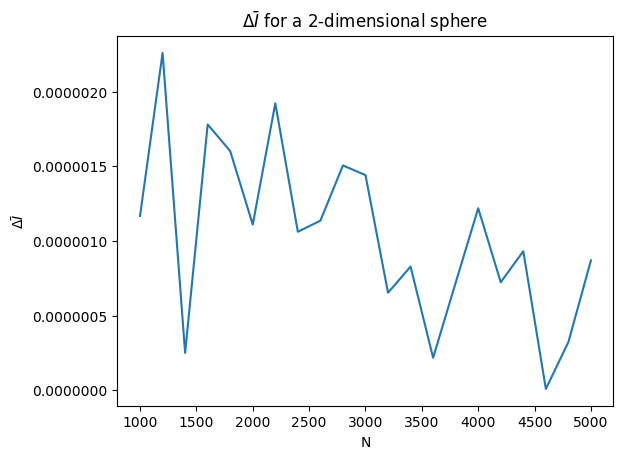

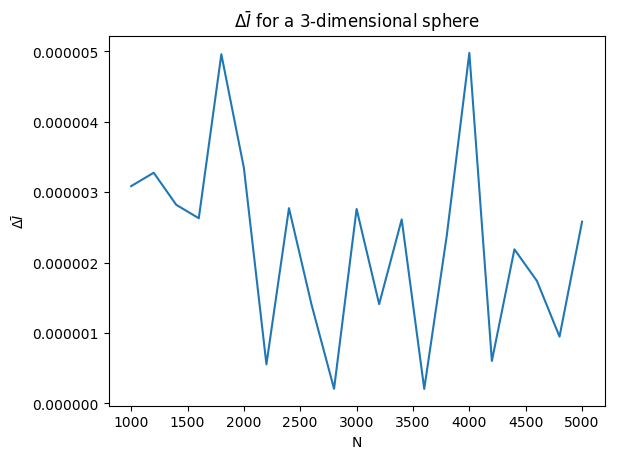

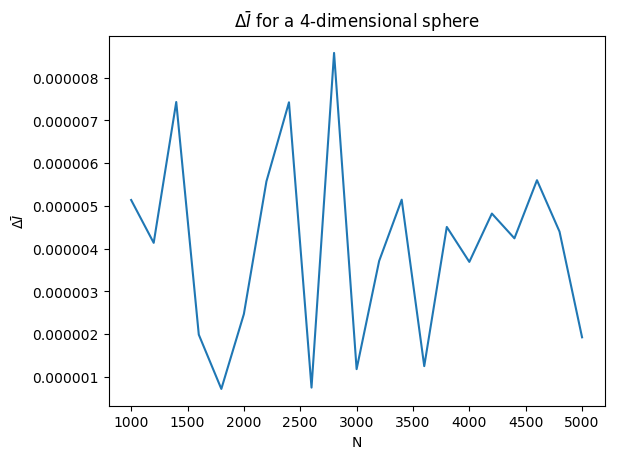

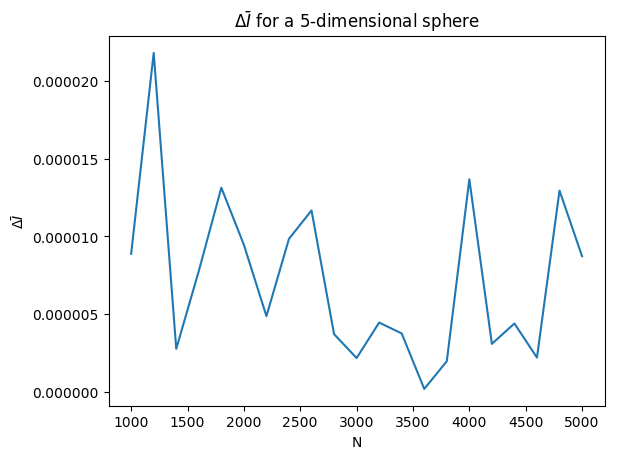

In [5]:
V_e_d(d) = pi^(d/2)/gamma(d/2+1)
M = 1000
steps = 21
d = 2
for d in [2 3 4 5]
    N = Int.(round.(linspace(1000,5000,steps),0))
    Y = Array{Float64}(steps)
    for i in 1:steps
        res = Array{Float64}(M)
        for j in 1:M
            res[j] = mDsphere(d, N[i])
        end
        Y[i] = abs(mean(res-V_e_d(d))/M)
    end
    figure(d)
    plot(N, Y)
    title("\$\\Delta \\bar I\$ for a $d-dimensional sphere")
    xlabel("N")
    ylabel("\$\\Delta \\bar I\$")
end
show()